# Simultaneous Multiple Curve Reconstruction

In [1]:
import sys
sys.path.insert(0, "../")

import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import dilation, disk

from curve_reconstruction.linear_model import LinearModel
from curve_reconstruction.smrf import SMRF

### Generate multiple interrupted lines

In [2]:
# Parameters
w,h = 100,100               # image width and height
sigma = 2                   # gaussian noise scale
a1_0, a1_1 = 30, 0.5        # 1st line intercept and slope
a2_0, a2_1 = 70, -0.5       # 2nd line intercept and slope
w1_start, w1_end = 30, 70   # width interruption 1st line
w2_start, w2_end = 40, 60   # width interruption 2nd line

# Generate 1st line
model_1 = LinearModel('line', [[a1_0, a1_1]])
x1 = np.array([x_i for x_i in np.arange(w) if x_i<w1_start or x_i>w1_end])
y1 = model_1.predict(x1,scale=sigma)
y1 = list(map(int,y1))

# Generate 2nd line
model_2 = LinearModel('line', [[a2_0, a2_1]])
x2 = np.array([x_i for x_i in np.arange(w) if x_i<w2_start or x_i>w2_end])
y2 = model_2.predict(x2,scale=sigma)
y2 = list(map(int,y2))

# Generate image
im = np.zeros((h,w), dtype=bool)
im[y1,x1] = 1
im[y2,x2] = 1
im = dilation(im,disk(1))

# Model data
y_im, x_im = im.nonzero()
X_im = model_1.basis_functions(x_im)

### Simultaneous Multiple Robust Fitting

In [12]:
# Initial parameters: 3 horizontal lines
a0_0, a0_1 = 10, 0
a1_0, a1_1 = 50, 0
a2_0, a2_1 = 80, 0

A_init = np.array([[a0_0, a0_1],
       [a1_0, a1_1],
       [a2_0, a2_1]])
model_init = LinearModel('line', A_init)
x = np.arange(w)
Y_init = model_init.predict(x)

In [5]:
# Select a noise model from Table 1 of Tarel et al. 2002, and scale suitable for the problem
noise_model = 'cauchy'
scale = 5
A_smrf = SMRF(X_im,y_im,A_init,noise_model,scale)
# Curve reconstruction
model_smrf = LinearModel('line', A_smrf)
Y_smrf = model_smrf.predict(x)

#### Plot results

Text(0.5, 1.0, 'Simultaneous Multiple Robust Fitting')

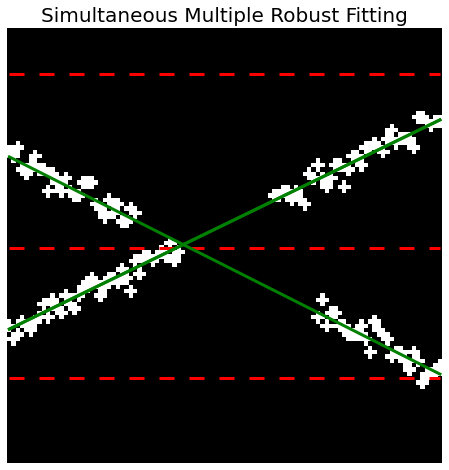

In [11]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
ax.imshow(im,cmap='gray')
for y in Y_init:
    ax.plot(x,y,'-r',lw=3,linestyle='--', dashes=(5,5))
for y in Y_smrf:
    ax.plot(x,y,'-g',lw=3)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Simultaneous Multiple Robust Fitting', fontsize=20)